<a href="https://colab.research.google.com/github/Sindhujashree-17/SCT_DS_TASKS/blob/main/SCT_DS_TASK04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_csv("/content/drive/MyDrive/accident.csv")

In [3]:
try:
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')
except Exception as e:
    print(f"Error converting time: {e}")

data['Hour'] = data['Time'].dt.hour

In [4]:

road_weather_group = data.groupby(['Road_surface_conditions', 'Weather_conditions', 'Hour']).size().reset_index(name='Accident_Count')

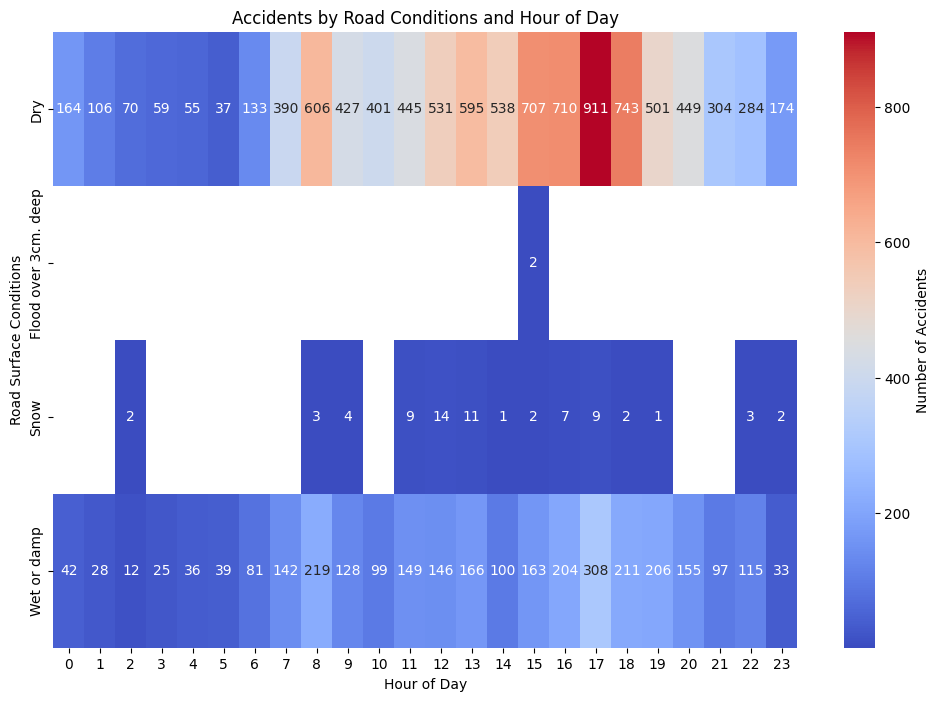

In [5]:
heatmap_data = road_weather_group.pivot_table(index='Road_surface_conditions', columns='Hour', values='Accident_Count', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Number of Accidents'})
plt.title('Accidents by Road Conditions and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Road Surface Conditions')
plt.show()

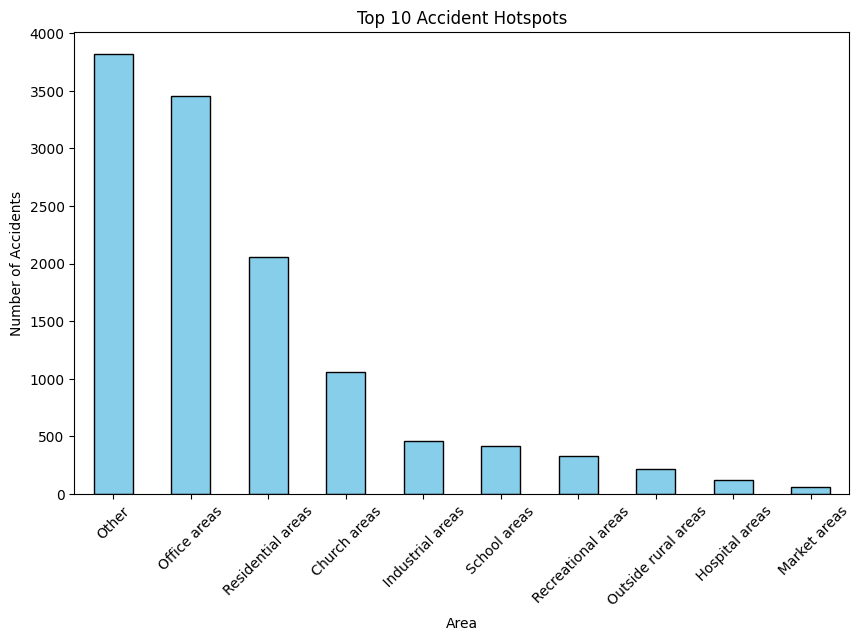

In [6]:
area_accident_group = data['Area_accident_occured'].value_counts().head(10)
plt.figure(figsize=(10, 6))
area_accident_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Accident Hotspots')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

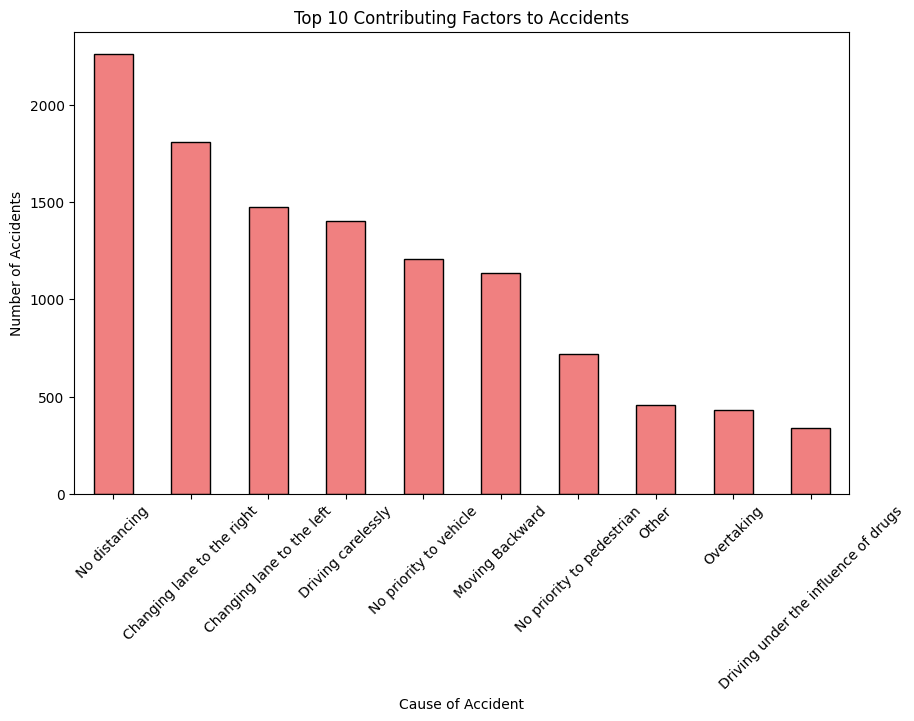

In [7]:
factors_group = data['Cause_of_accident'].value_counts().head(10)
plt.figure(figsize=(10, 6))
factors_group.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Contributing Factors to Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [8]:
os.makedirs('/mnt/data', exist_ok=True)

In [9]:
data.to_csv('/mnt/data/cleaned_accident_data.csv', index=False)